# Dataset Information
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

# Attribute Information:
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

instant: record index dteday : date season : season (1:winter, 2:spring, 3:summer, 4:fall) yr : year (0: 2011, 1:2012) mnth : month ( 1 to 12) hr : hour (0 to 23) holiday : weather day is holiday or not (extracted from [Web Link]) weekday : day of the week workingday : if day is neither weekend nor holiday is 1, otherwise is 0. weathersit : 1: Clear, Few clouds, Partly cloudy, Partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale) atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) hum: Normalized humidity. The values are divided to 100 (max) windspeed: Normalized wind speed. The values are divided to 67 (max) casual: count of casual users registered: count of registered users cnt: count of total rental bikes including both casual and registered


	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set(rc={'figure.figsize': [15,4]}, font_scale=1.5)

import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [2]:
bike = pd.read_csv('./day.csv', parse_dates=["dteday"])
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
bike.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [4]:
bike.shape

(731, 16)

### -The data set have 16 columns and 731 rows. 

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

- we have here three data types we are dealing with, dateTime, int, and float

- and we have zero null values, also to check:

In [6]:
# Checking for null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#checking for duplicates
bike_dup=bike
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(731, 16)

- there are no duplicates, as the rows are same as shape.

- Data Preperation -The data to be cleaned interms of parameters before creating the models.

In [8]:
#rename the columns
bike.rename(columns={'dteday':'Date','yr':'Year','mnth':'month','hum':'humidity','cnt':'count'},inplace =True)
bike.head()

,instant,Date,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Here the variables to be mapped for better understanding and for model preperation

In [9]:
#mapping the vars - season,month,weathersit,weekday
bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter'})
bike['month']=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike.head()

,instant,Date,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,spring,0,Jan,0,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,Jan,0,Sun,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Data Visualisation Here exploratory data analysis to be done to understand the data and business problem

In [10]:
# #pairplot for numeric variables
# sns.pairplot(bike, vars=['count', 'temp', 'atemp', 'humidity', 'windspeed', 'registered', 'casual'])
# plt.show()

<Axes: xlabel='count', ylabel='temp'>

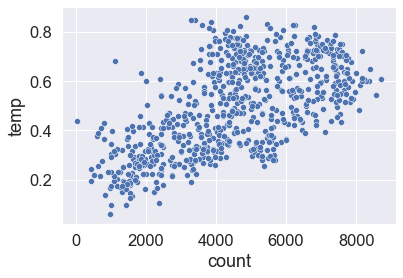

In [11]:
sns.scatterplot(data = bike, x='count', y='temp')

<Axes: xlabel='count', ylabel='humidity'>

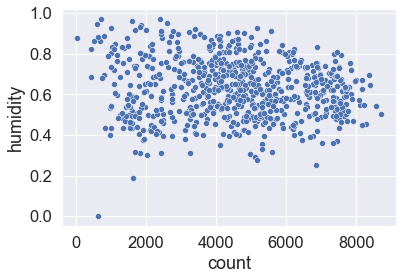

In [12]:
sns.scatterplot(data = bike, x='count', y='humidity')

<Axes: xlabel='count', ylabel='windspeed'>

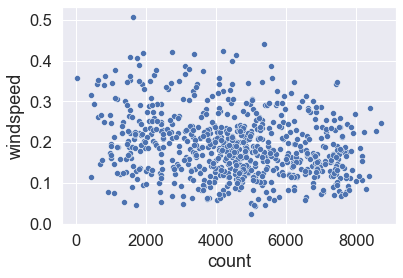

In [13]:
sns.scatterplot(data = bike, x='count', y='windspeed')

- Here if we look closely, we can observe

1- Total count of the bikes are corelated to Temperature /n
2- Total count is not influenced with Windspeed,humidity

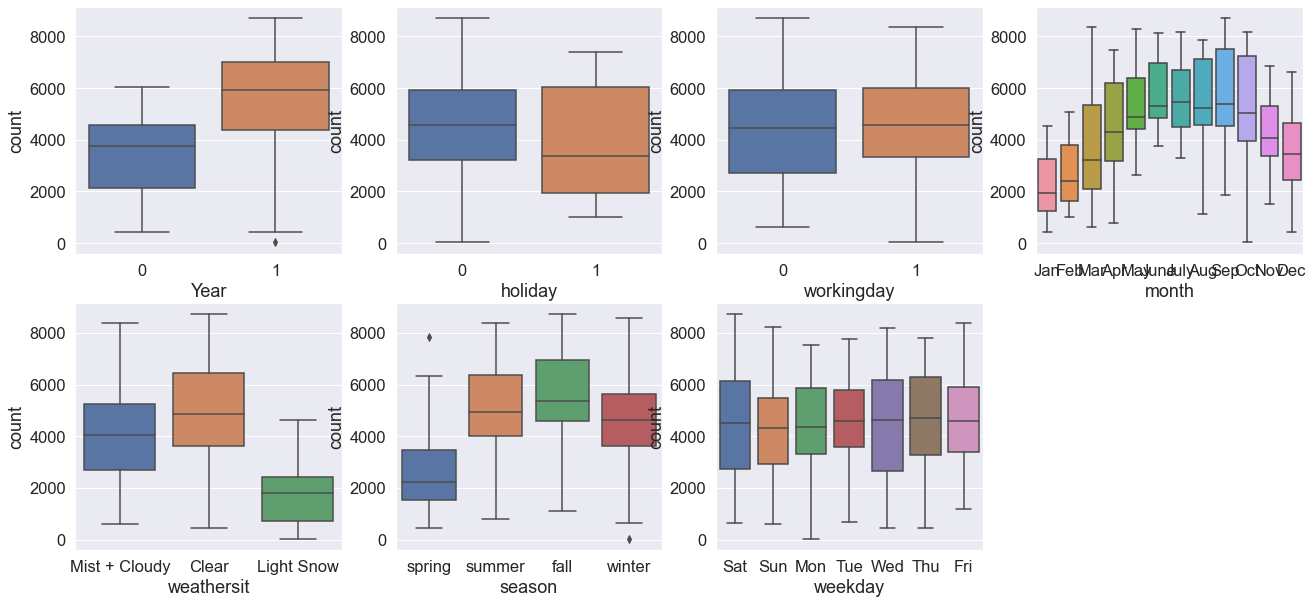

In [14]:
# scatter plot for categorical vars
plt.figure(figsize=(22, 10))

plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = bike)

plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike)

plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = bike)

plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)

plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = bike)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = bike)

plt.show()

- More bike rentals in 2019
- Equal bike rentals in hoidays / non-holidays
- Working days doesn't matter
- Peaked on Aug to Oct
- More rentals on Clear weather
- More rentals on fall

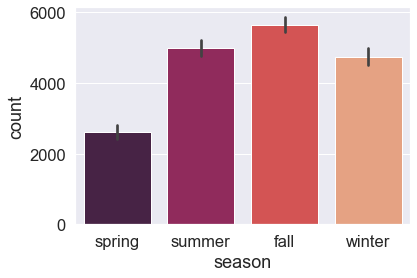

In [15]:
sns.barplot(x='season',y='count',data=bike,palette="rocket",)
plt.show()

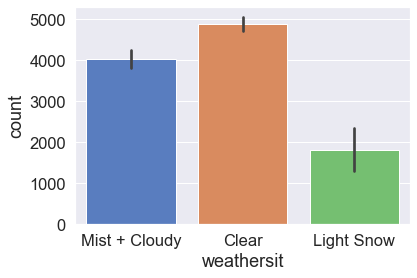

In [16]:
#Relation between weather and count of bike rentals
sns.barplot(x='weathersit',y='count',palette="muted",data=bike)
plt.show()

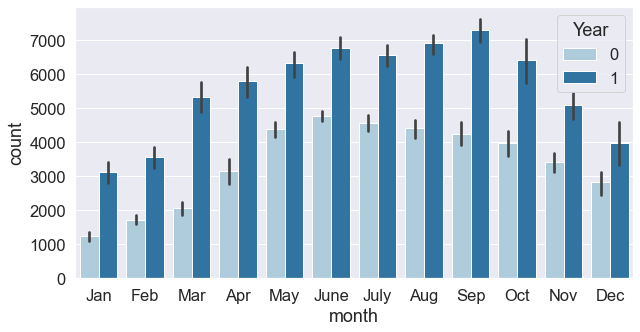

In [17]:
#Relation between month and total bikes
plt.figure(figsize=(10,5))
sns.barplot(x='month',y='count',hue='Year',data=bike,palette='Paired')
plt.show()

#### Model Building

- remove unwanted variables before the model building
- Create dummy variables
- Split the data to train / test
- rescaling the data
- Model building
- Recurring FEature Elimination
- Iteration of models based on the stats values

In [18]:
#dropping the unwanted variables - instant, date, casual, registered
bike.drop(['Date', 'instant','casual','registered'],axis=1, inplace=True)
# bike.drop(['Date', 'instant','count'],axis=1, inplace=True)
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,801
2,spring,0,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,spring,0,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,spring,0,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,1600


In [19]:
#final shape
bike.shape

(731, 12)

In [20]:
bike.to_csv('cleaned_day')

## models imports

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [22]:
#split the data to train & test
#splitting the data set for train & test
# bike_train, bike_test = train_test_split(bike,train_size=0.7,random_state= 100)

In [23]:
#check the ratio
# print(bike_train.shape)
# print(bike_test.shape)

#### Rescaling the data

- We will be using MinMax scaler

In [26]:
#minMax the scale 
scaler=MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','atemp','humidity','windspeed','count']

#fit on data
bike[num_vars]=scaler.fit_transform(bike[num_vars])
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,0.355170,0.373517,0.828620,0.284606,0.110792
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,0.379232,0.360541,0.715771,0.466215,0.089623
2,spring,0,Jan,0,Mon,1,Clear,0.171000,0.144830,0.449638,0.465740,0.152669
3,spring,0,Jan,0,Tue,1,Clear,0.175530,0.174649,0.607131,0.284297,0.177174
4,spring,0,Jan,0,Wed,1,Clear,0.209120,0.197158,0.449313,0.339143,0.181546


In [27]:
bike.describe()

,Year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.500684,0.028728,0.683995,0.543594,0.518864,0.645649,0.346536,0.515687
std,0.500342,0.167155,0.465233,0.228091,0.213909,0.146457,0.159766,0.222873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.346343,0.339674,0.534704,0.232045,0.360101
50%,1.000000,0.000000,1.000000,0.547268,0.535113,0.644388,0.326928,0.520709
75%,1.000000,0.000000,1.000000,0.743002,0.695083,0.750857,0.434622,0.682697
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Spliting

In [28]:
# # Data Splitting into features and target
# X = bike_train.drop('count', axis=1)
# y = bike_train['count']

# # Splitting into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # , stratify

In [29]:
# Data Splitting into features and target
# X = bike.drop(columns =['casual','registered'], axis=1)
# y = bike[['casual','registered']]
X = bike.drop(columns =['count'], axis=1)
y = bike['count']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
y_train.shape

(584,)

In [31]:
X_train.shape

(584, 11)

In [32]:
y_test.shape

(147,)

In [33]:
categorical_cols = list(bike.select_dtypes(include=['object']).columns)
categorical_cols

['season', 'month', 'weekday', 'weathersit']

In [37]:
# numerical_cols = list(bike.select_dtypes(include=['int64', 'float64']).columns)
# crl= ['casual','registered']
# for i in crl:
#     numerical_cols.remove(i)

# numerical_cols

numerical_cols = list(bike.select_dtypes(include=['int64', 'float64']).columns)
numerical_cols.remove('count')
numerical_cols

['Year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed']

In [38]:
# Data Preprocessing
from category_encoders import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[('oneHot', OneHotEncoder())])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['Year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed']),
        ('cat', categorical_transformer, ['season', 'month', 'weekday', 'weathersit'])])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [39]:
# Model Building
from sklearn.linear_model import LinearRegression

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_preprocessed, y_train)

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = lr.predict(X_test_preprocessed)



# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 0.1298602460826266
R2: 0.6822685136593842


# Data Preprocessing


In [40]:
X_train.isnull().sum()

season        0
Year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [41]:
X_train.describe()

,Year,holiday,workingday,temp,atemp,humidity,windspeed
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.517123,0.025685,0.669521,0.549558,0.524359,0.649029,0.346938
std,0.500135,0.158329,0.470789,0.226224,0.212212,0.146188,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354130,0.351343,0.536311,0.230777
50%,1.000000,0.000000,1.000000,0.565959,0.556663,0.652314,0.324347
75%,1.000000,0.000000,1.000000,0.743781,0.696319,0.754713,0.436240
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.989717,0.864144


# Model Building

In [42]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_preprocessed, y_train)


print('Training Score: ', lr.score(X_train_preprocessed, y_train))
print('Testing Score: ', lr.score(X_test_preprocessed, y_test))

Training Score:  0.6415252999237926
Testing Score:  0.6822685136593842


In [43]:
# Ridge

from sklearn.linear_model import Ridge

r = Ridge()
r.fit(X_train_preprocessed, y_train)

print('Training Score: ', r.score(X_train_preprocessed, y_train))
print('Testing Score: ', r.score(X_test_preprocessed, y_test))

Training Score:  0.8462482536337705
Testing Score:  0.842959055721597


In [44]:
# Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = lasso.predict(X_test_preprocessed)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 0.23264758505093788
R2: -0.019776286741366222


In [45]:
# # support vector regression (SVR)

# from sklearn.svm import SVR

# svr = SVR()
# svr.fit(X_train_preprocessed, y_train)

# print('Training Score: ', svr.score(X_train_preprocessed, y_train))
# print('Testing Score: ', svr.score(X_test_preprocessed, y_test))

In [46]:
# support vector regression (SVR)

# from sklearn.svm import SVR

# svr = SVR(kernel='linear')
# svr.fit(X_train_preprocessed, y_train)

# print('Training Score: ', svr.score(X_train_preprocessed, y_train))
# print('Testing Score: ', svr.score(X_test_preprocessed, y_test))

In [47]:
# # support vector regression (SVR)

# from sklearn.svm import SVR

# svr = SVR(kernel='poly')
# svr.fit(X_train_preprocessed, y_train)

# print('Training Score: ', svr.score(X_train_preprocessed, y_train))
# print('Testing Score: ', svr.score(X_test_preprocessed, y_test))

In [48]:
# DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_train_preprocessed, y_train)

print('Training Score: ', dt.score(X_train_preprocessed, y_train))
print('Testing Score: ', dt.score(X_test_preprocessed, y_test))

Training Score:  1.0
Testing Score:  0.7745810498338523


In [49]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=12 ,random_state=42, max_depth=9)

rf.fit(X_train_preprocessed, y_train)

print('Training Score: ', rf.score(X_train_preprocessed, y_train))
print('Testing Score: ', rf.score(X_test_preprocessed, y_test))

Training Score:  0.9641938175352064
Testing Score:  0.8753825845464184


In [50]:
rf.feature_importances_

array([2.94883205e-01, 1.39235671e-03, 2.80382960e-03, 2.59867331e-01,
       2.35888230e-01, 5.67118805e-02, 2.68934574e-02, 4.72975632e-02,
       8.92015975e-05, 1.32580442e-03, 2.23540749e-02, 2.75295813e-04,
       1.87009622e-03, 2.97313014e-03, 8.36148916e-04, 1.63267784e-03,
       3.64610195e-04, 2.39144437e-03, 1.32498296e-03, 3.68675833e-03,
       1.40234911e-03, 1.91714104e-03, 2.03785280e-04, 1.45343224e-03,
       8.82368482e-04, 3.15337351e-03, 5.76655759e-03, 7.10723450e-04,
       4.01659688e-04, 7.63327691e-04, 2.30801207e-03, 1.06209701e-02,
       5.55422090e-03])

In [51]:
column_names = preprocessor.get_feature_names_out()

In [52]:
# pd.DataFrame({'Feature': column_names.columns, 'Importance': rf.feature_importances_.round(3)}).sort_values('Importance', ascending=False)
pd.DataFrame({'Feature': column_names, 'Importance': rf.feature_importances_.round(3)}).sort_values('Importance', ascending=False)

,Feature,Importance
0,num__Year,0.295
3,num__temp,0.260
4,num__atemp,0.236
5,num__humidity,0.057
7,cat__season_1,0.047
6,num__windspeed,0.027
10,cat__season_4,0.022
31,cat__weathersit_2,0.011
26,cat__weekday_4,0.006
32,cat__weathersit_3,0.006


<Axes: >

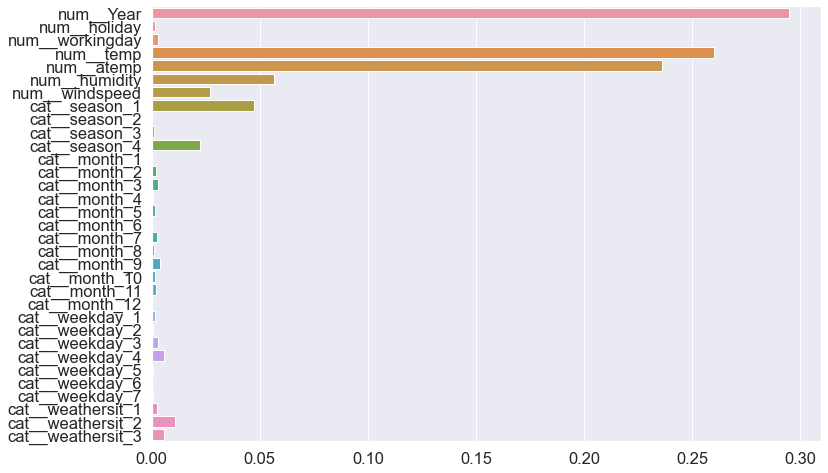

In [53]:
plt.figure(figsize=(12,8))
sns.barplot(x=rf.feature_importances_, y=column_names)

In [54]:
# plt.figure(figsize=(12,8))
# sns.barplot(x=rf.feature_importances_, y=X_train.columns)


In [55]:
# # Voting Regressor

# from sklearn.ensemble import  VotingRegressor
# from sklearn.svm import SVR

# lin_reg = LinearRegression()
# dt_reg = DecisionTreeRegressor(max_depth=10)
# svr_reg = SVR(kernel='rbf')

# # Voting Regressor
# voting_reg = VotingRegressor(estimators=[('lr', lin_reg), ('dt', dt_reg), ('svr', svr_reg)])

# # Fitting the data
# voting_reg.fit(X_train_preprocessed, y_train)

# # Checking the score
# print('Training Score: ', voting_reg.score(X_train_preprocessed, y_train))
# print('Testing Score: ', voting_reg.score(X_test_preprocessed, y_test))

In [56]:
# # AdaBoost Regressor

# from sklearn.ensemble import AdaBoostRegressor

# ada_reg = AdaBoostRegressor(n_estimators=200, random_state=42)

# # Fitting the data
# ada_reg.fit(X_train_preprocessed, y_train)

# # Checking the score
# print('Training Score: ', ada_reg.score(X_train_preprocessed, y_train))
# print('Testing Score: ', ada_reg.score(X_test_preprocessed, y_test))

In [57]:
# # GradientBoostingRegressor

# from sklearn.ensemble import GradientBoostingRegressor

# grad_reg = GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=42)

# # Fitting the data
# grad_reg.fit(X_train_preprocessed, y_train)

# # Checking the score
# print('Training Score: ', grad_reg.score(X_train_preprocessed, y_train))
# print('Testing Score: ', grad_reg.score(X_test_preprocessed, y_test))

In [58]:
# pip install xgboost


In [59]:
# XGBoost

from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=300, max_depth=3, random_state=42)

# Fitting the data
xgb.fit(X_train_preprocessed, y_train)

# Checking the score
print('Training Score: ', xgb.score(X_train_preprocessed, y_train))
print('Testing Score: ', xgb.score(X_test_preprocessed, y_test))

Training Score:  0.9983458341832985
Testing Score:  0.8812028882079013


In [60]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    'n_estimators':[100,200,300,400],
    'max_depth': range(3,8),
}
clf = XGBRegressor()
RCV = RandomizedSearchCV(estimator=clf, 
                   param_distributions=parameters, 
                   n_iter=3,
                   cv=3)

In [61]:
RCV.fit(X_train_preprocessed,y_train)


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=3,
                   param_distributions={'max_depth': range(3, 8),
                                        'n_estimators': [100, 200, 300, 400]})

In [62]:
RCV.best_params_

{'n_estimators': 100, 'max_depth': 3}

In [63]:
RCV.best_score_

0.8711281827622526

In [64]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators':[100,200,300,400],
    'max_depth': range(3,8),
}
clf = XGBRegressor()
GCV = GridSearchCV(estimator=clf, 
                   param_grid=parameters, 
                   cv=3)

In [65]:
GCV.fit(X_train_preprocessed , y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': range(3, 8),
                         'n_estimators': [100, 200, 300, 400]})

In [66]:
GCV.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [67]:
GCV.best_score_

0.8711281827622526

In [68]:
# # XGBoost

# from xgboost import XGBRegressor

# xgb = XGBRegressor(n_estimators=100, max_depth=2, random_state=42)

# # Fitting the data
# xgb.fit(X_train_preprocessed, y_train)

# # Checking the score
# print('Training Score: ', xgb.score(X_train_preprocessed, y_train))
# print('Testing Score: ', xgb.score(X_test_preprocessed, y_test))

In [69]:
# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=10, random_state=0)

RandomForestRegressor()

# Fitting the data
regr.fit(X_train_preprocessed, y_train)

# Checking the score
print('Training Score: ', regr.score(X_train_preprocessed, y_train))
print('Testing Score: ', regr.score(X_test_preprocessed, y_test))

Training Score:  0.974655179539385
Testing Score:  0.883873674339247


In [70]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# # >>> from sklearn.datasets import make_classification
# rfc=RandomForestClassifier(random_state=42)
# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }
# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)

In [71]:
# from sklearn import svm
# from sklearn.model_selection import GridSearchCV

# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters)
# clf.fit(X_train, y_train)
# GridSearchCV(estimator=SVC(),
#              param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
# # sorted(clf.cv_results_.keys())

In [72]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=10, random_state=0, 
                             criterion='absolute_error')
regr.fit(X_train_preprocessed, y_train)
RandomForestRegressor()

# Checking the score
print('Training Score: ', regr.score(X_train_preprocessed, y_train))
print('Testing Score: ', regr.score(X_test_preprocessed, y_test))

Training Score:  0.9689215671710734
Testing Score:  0.8698692030223747


In [73]:
regr = RandomForestRegressor(max_depth=10, random_state=1, 
                             criterion='friedman_mse')
regr.fit(X_train_preprocessed, y_train)
RandomForestRegressor()

# Checking the score
print('Training Score: ', regr.score(X_train_preprocessed, y_train))
print('Testing Score: ', regr.score(X_test_preprocessed, y_test))

Training Score:  0.9744379814042449
Testing Score:  0.8818622678934328


In [74]:
Models_Summarization = pd.DataFrame(
                {
                    
'Training Accuracy': [round(lr.score(X_train_preprocessed, y_train) * 100, 2), 
                                          round(r.score(X_train_preprocessed, y_train) * 100, 2), 
#                                           round(svr.score(X_train_preprocessed, y_train) * 100, 2), 
                                          round(dt.score(X_train_preprocessed, y_train) * 100, 2), 
                                          round(rf.score(X_train_preprocessed, y_train) * 100, 2), 
#                                           round(voting_reg.score(X_train_preprocessed, y_train) * 100, 2), 
#                                           round(bag_reg.score(X_train_preprocessed, y_train) * 100, 2),
#                                           round(ada_reg.score(X_train_preprocessed, y_train) * 100, 2),
#                                           round(grad_reg.score(X_train_preprocessed, y_train) * 100, 2),
                                          round(xgb.score(X_train_preprocessed, y_train) * 100, 2),
                                          round(regr.score(X_train_preprocessed, y_train) * 100, 2)], 
'Teasting Accuracy': [round(lr.score(X_test_preprocessed, y_test) * 100, 2), 
                                         round(r.score(X_test_preprocessed, y_test) * 100, 2), 
#                                          round(svr.score(X_test_preprocessed, y_test) * 100, 2), 
                                         round(dt.score(X_test_preprocessed, y_test) * 100, 2), 
                                         round(rf.score(X_test_preprocessed, y_test) * 100, 2), 
#                                          round(voting_reg.score(X_test_preprocessed, y_test) * 100, 2), 
#                                          round(bag_reg.score(X_test_preprocessed, y_test) * 100, 2), 
#                                          round(ada_reg.score(X_test_preprocessed, y_test) * 100, 2),
#                                          round(grad_reg.score(X_test_preprocessed, y_test) * 100, 2),
                                         round(xgb.score(X_test_preprocessed, y_test) * 100, 2),
                     round(regr.score(X_test_preprocessed, y_test) * 100, 2)], 
              
                },
    
    index = ['Linear Regression', 'Ridge Regression',  ' DecisionTreeRegressor', 
         'Random Forest Regressor','XGBoost','RandomForest with GridSearch']
            )

In [75]:
Models_Summarization

,Training Accuracy,Teasting Accuracy
Linear Regression,64.15,68.23
Ridge Regression,84.62,84.30
DecisionTreeRegressor,100.00,77.46
Random Forest Regressor,96.42,87.54
XGBoost,99.83,88.12
RandomForest with GridSearch,97.44,88.19


In [76]:
cleandays = pd.read_csv('./cleaned_day')
cleandays.head()

,Unnamed: 0,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,0,spring,0,Jan,0,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,985
1,1,spring,0,Jan,0,Sun,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,801
2,2,spring,0,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,3,spring,0,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,4,spring,0,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,1600


In [77]:
import pickle

In [78]:
pickle.dump(xgb, open('model.pkl', 'wb'))

In [79]:
# Preprocessor Saving
pickle.dump(preprocessor, open('preprocessor.pkl', 'wb'))

In [80]:
import sklearn
print(sklearn.__version__)

1.3.1
